In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import codecs
import collections

### Define

In [11]:
home = "saintsfc"
away = "ncfc"

### Load Data and Preprocessing

In [4]:
# Read file
tweets_file = open("../../EPLdata/1508302130_SAINTSvsNCFC.txt", "r")

In [5]:
# Parsing JSON

tweets_data = []
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [6]:
tweets_file.close()

In [6]:
print len(tweets_data)

5346


In [7]:
tweets_data[5345]['text']

u'@michaeljbailey if we could have kept it 0-0 at half time may have been different 2nd half. No way back now, needless red card #ncfc'

### Create DataFrame as tweets

In [12]:
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
tweets['hashtags'] = map(lambda tweet: map(lambda tag: tag['text'], tweet['entities']['hashtags']), tweets_data)

In [15]:
# 0: no tags, 3: both team tags, 1: only home team tags, 2: only away team tags, 4: other tags
def find_tag(tag):
    tag = map(lambda t: t.lower(), tag)
    if not tag:
        return 0
    if home in tag and away in tag:
        return 3
    if home in tag:
        return 1
    if away in tag:
        return 2
    else:
        return 4

tweets["tag_num"] = map(lambda tags: find_tag(tags), tweets['hashtags'])

In [16]:
tweets.head()

,text,lang,country,hashtags,tag_num
0,RT @SkyFootball: Wanyama is not included in #S...,en,None,[SaintsFC],1
1,#ncfc #BPL,und,None,"[ncfc, BPL]",2
2,I really don't think #SaintsFC have the capabi...,en,None,[SaintsFC],1
3,Southampton VS Norwich\n\nLive Stream : http:/...,en,None,"[saintsfc, NCFC, SOUNOR, SAINTS, CITY, WeMarch...",3
4,RT @SouthamptonFC: #SaintsFC team against #NCF...,sl,None,"[SaintsFC, NCFC]",3


In [43]:
# tweets[tweets["tag_num"] == 0]
# tweets_data[53]

In [44]:
home_hashtags = len(tweets[tweets["tag_num"] == 1])
away_hashtags = len(tweets[tweets["tag_num"] == 2])
both_hashtags = len(tweets[tweets["tag_num"] == 3])
no_hashtags = len(tweets[tweets["tag_num"] == 4])
other_hashtags = len(tweets[tweets["tag_num"] == 0])

print "Home Team Tags: ", home_hashtags
print "Away Team Tags: ", away_hashtags
print "Both Team Tags: ", both_hashtags
print "Other Team Tags: ", other_hashtags
print "No Tags: \t", no_hashtags
print "All Tweets: ", len(tweets)

Home Team Tags:  1786
Away Team Tags:  1617
Both Team Tags:  1808
Other Team Tags:  115
No Tags: 	20
All Tweets:  5346


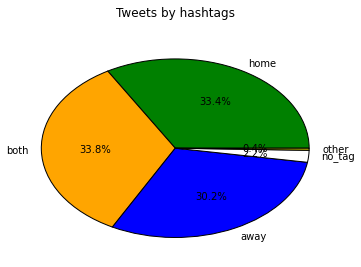

In [45]:
# Plot Hashtags Pie
slices = [home_hashtags, both_hashtags, away_hashtags, other_hashtags, no_hashtags]
activities = ['home','both','away', 'no_tag', 'other']
cols = ['g','orange','b', 'w', 'y']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Tweets by hashtags\n')
plt.show()

### Top 5 languages

en     4467
fr      302
es      138
und     104
ja       50
dtype: int64

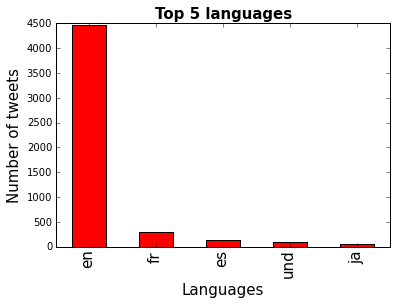

In [46]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
tweets_by_lang[:5]

### Top 5 countries

United Kingdom              174
United States                12
Italia                        6
España                        4
المملكة العربية السعودية      4
dtype: int64

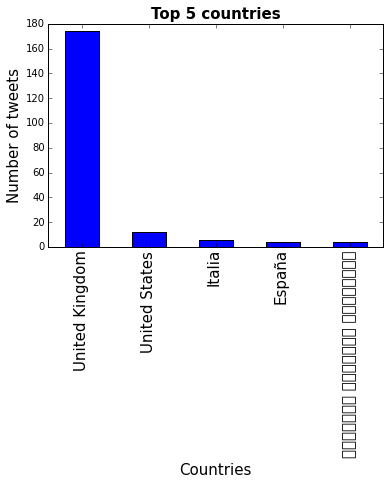

In [47]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
tweets_by_country[:5]

In [15]:
# tweets_by_country

In [48]:
print "country: ", sum(tweets_by_country)
print "None: ", len(tweets_data) - sum(tweets_by_country)

country:  222
None:  5124


### Count All Words

In [49]:
tweets_eng = tweets[tweets["lang"] == "en"]
tweets_eng.head()

,text,lang,country,hashtags,tag_num
0,RT @SkyFootball: Wanyama is not included in #S...,en,None,[SaintsFC],1
2,I really don't think #SaintsFC have the capabi...,en,None,[SaintsFC],1
3,Southampton VS Norwich\n\nLive Stream : http:/...,en,None,"[saintsfc, NCFC, SOUNOR, SAINTS, CITY, WeMarch...",3
5,RT @SkySportsStatto: #saintsfc &amp; #ncfc met...,en,None,"[saintsfc, ncfc]",3
6,RT @aka_luis_: bamussss #saintsfc,en,None,[saintsfc],1


In [50]:
print len(tweets_eng)

4467


In [51]:
# create all words lists
all_words = []

for tweet in tweets_eng["text"]:
    tweet_words = word_tokenize(tweet)
    for word in tweet_words:
        all_words.append(word.lower())

In [52]:
# count all words
counted_all_words = collections.Counter(all_words)
counted_all_words.most_common()[:20]

[(u'#', 9717),
 (u':', 4654),
 (u'ncfc', 3006),
 (u'saintsfc', 2735),
 (u'.', 2456),
 (u'@', 2322),
 (u'the', 1938),
 (u'http', 1831),
 (u'rt', 1606),
 (u'norwich', 1316),
 (u'southampton', 1239),
 (u'!', 1182),
 (u',', 1048),
 (u'to', 1022),
 (u'a', 911),
 (u"'s", 893),
 (u'sounor', 856),
 (u'live', 800),
 (u'for', 672),
 (u'stream', 662)]

### Extract Adjective Words

In [54]:
tweets_eng['text'][2]

u"I really don't think #SaintsFC have the capability of staying above tenth this year."

In [55]:
nltk.pos_tag(word_tokenize(tweets_eng['text'][2]))

[(u'I', 'PRP'),
 (u'really', 'RB'),
 (u'do', 'VBP'),
 (u"n't", 'RB'),
 (u'think', 'VB'),
 (u'#', '#'),
 (u'SaintsFC', 'NNP'),
 (u'have', 'VBP'),
 (u'the', 'DT'),
 (u'capability', 'NN'),
 (u'of', 'IN'),
 (u'staying', 'VBG'),
 (u'above', 'IN'),
 (u'tenth', 'NN'),
 (u'this', 'DT'),
 (u'year', 'NN'),
 (u'.', '.')]

In [56]:
# create J all words lists
all_J_words = []

#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for tweet in tweets_eng["text"]:
    
    tweet_words = word_tokenize(tweet)
    
    tweet_words_pos = nltk.pos_tag(tweet_words)
    
    for word in tweet_words_pos:
        if word[1][0] in allowed_word_types and word[0][0] != "/":
            all_J_words.append(word[0].lower())

In [57]:
# count J all words
counted_all_J_words = collections.Counter(all_J_words)
counted_all_J_words.most_common()[:20]

[(u'half-time', 276),
 (u'good', 141),
 (u'first', 118),
 (u'late', 103),
 (u'second', 98),
 (u'10-man', 98),
 (u'tadi\u0107', 62),
 (u'last', 55),
 (u'stupid', 52),
 (u'great', 46),
 (u'ten-man', 45),
 (u'poor', 45),
 (u'live', 43),
 (u'breakthrough', 39),
 (u'better', 35),
 (u'long', 35),
 (u'best', 35),
 (u'yellow', 34),
 (u'ward-prowse', 33),
 (u'massive', 31)]

In [73]:
counted_all_J_words.most_common()

[(u'half-time', 276),
 (u'good', 141),
 (u'first', 118),
 (u'late', 103),
 (u'second', 98),
 (u'10-man', 98),
 (u'tadi\u0107', 62),
 (u'last', 55),
 (u'stupid', 52),
 (u'great', 46),
 (u'ten-man', 45),
 (u'poor', 45),
 (u'live', 43),
 (u'breakthrough', 39),
 (u'better', 35),
 (u'long', 35),
 (u'best', 35),
 (u'yellow', 34),
 (u'ward-prowse', 33),
 (u'massive', 31),
 (u'more', 30),
 (u'free-kick', 30),
 (u'bad', 26),
 (u'close', 26),
 (u'top', 25),
 (u'many', 25),
 (u'other', 25),
 (u'early', 25),
 (u'big', 24),
 (u'wide', 23),
 (u'hard', 22),
 (u'least', 21),
 (u'commentary', 21),
 (u'strong', 20),
 (u'free', 18),
 (u'much', 16),
 (u'high', 15),
 (u'next', 14),
 (u'offside', 14),
 (u'such', 13),
 (u'quick', 12),
 (u'back-to-back', 12),
 (u'foul', 11),
 (u'few', 11),
 (u'same', 11),
 (u'awful', 10),
 (u'public', 10),
 (u'fantastic', 10),
 (u'h/t', 10),
 (u'fit', 10),
 (u'idiotic', 10),
 (u'fu***d', 10),
 (u'unnecessary', 10),
 (u'italian', 10),
 (u'new', 9),
 (u'ultimatefanlive', 9),
 (

In [ ]:
# tweets.head()
# tweets.tail()
# tweets.columns
# tweets.values
# tweets.values[0]
tweets.describe()
# tweets.T
# tweets.sort_index(axis=1, ascending=False)
# tweets.sort(columns='lang')
# tweets['lang']
# tweets.text
# tweets[0:5]
# tweets.loc[:,['text','country']]
# tweets.loc[1:7,['text','lang']]
# tweets.loc[1,['text','lang']]
# tweets.iloc[1:3, 0:3]
# tweets.groupby(['lang', 'country']).sum()

### Tweets Sentiment

In [58]:
# sentiment_mod.py
import sentiment_mod as s

In [59]:
print tweets_eng['text'][2]
print s.sentiment(tweets_eng['text'][2])

I really don't think #SaintsFC have the capability of staying above tenth this year.
('pos', 1.0)


In [60]:
home_tweets = tweets_eng[tweets_eng["tag_num"] == 1]
away_tweets = tweets_eng[tweets_eng["tag_num"] == 2]

In [61]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
0,RT @SkyFootball: Wanyama is not included in #S...,en,None,[SaintsFC],1
2,I really don't think #SaintsFC have the capabi...,en,None,[SaintsFC],1
6,RT @aka_luis_: bamussss #saintsfc,en,None,[saintsfc],1
11,1: Saints under way and kicking towards the No...,en,None,[SaintsFC],1
20,First long ball.... A what point does it becom...,en,None,[saintsfc],1


In [62]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
7,RT @BobRutler: #ncfc fans at Southampton. http...,en,None,[ncfc],2
14,RT @premierleague: Alex Neil on #NCFC's strong...,en,None,"[NCFC, SOUNOR]",2
15,RT @premierleague: Alex Neil on #NCFC's strong...,en,None,"[NCFC, SOUNOR]",2
24,RT @premierleague: #NCFC are bidding to win ba...,en,None,"[NCFC, BPL, SOUNOR]",2
26,Southampton's line-up against Nowich. #lcfc #m...,en,None,"[lcfc, mufc, mcfc, cpfc, lfc, scfc, efc, ncfc,...",2


In [63]:
import pandas as pd

In [64]:
home_tweets = pd.DataFrame(home_tweets.values, range(len(home_tweets)), home_tweets.columns)
away_tweets = pd.DataFrame(away_tweets.values, range(len(away_tweets)), away_tweets.columns)

In [65]:
home_tweets.head()

,text,lang,country,hashtags,tag_num
0,RT @SkyFootball: Wanyama is not included in #S...,en,None,[SaintsFC],1
1,I really don't think #SaintsFC have the capabi...,en,None,[SaintsFC],1
2,RT @aka_luis_: bamussss #saintsfc,en,None,[saintsfc],1
3,1: Saints under way and kicking towards the No...,en,None,[SaintsFC],1
4,First long ball.... A what point does it becom...,en,None,[saintsfc],1


In [66]:
away_tweets.head()

,text,lang,country,hashtags,tag_num
0,RT @BobRutler: #ncfc fans at Southampton. http...,en,None,[ncfc],2
1,RT @premierleague: Alex Neil on #NCFC's strong...,en,None,"[NCFC, SOUNOR]",2
2,RT @premierleague: Alex Neil on #NCFC's strong...,en,None,"[NCFC, SOUNOR]",2
3,RT @premierleague: #NCFC are bidding to win ba...,en,None,"[NCFC, BPL, SOUNOR]",2
4,Southampton's line-up against Nowich. #lcfc #m...,en,None,"[lcfc, mufc, mcfc, cpfc, lfc, scfc, efc, ncfc,...",2


## Sentiment Analysis

In [67]:
home_sent = map(lambda tweet: s.sentiment(tweet)[0], home_tweets["text"])

In [68]:
away_sent = map(lambda tweet: s.sentiment(tweet)[0], away_tweets["text"])

In [69]:
print "Home Team:", collections.Counter(home_sent)
print "Away Team:", collections.Counter(away_sent)

Home Team: Counter({'neg': 899, 'pos': 414})
Away Team: Counter({'neg': 1276, 'pos': 265})


In [70]:
home_sent = collections.Counter(home_sent)
away_sent = collections.Counter(away_sent)

Positive Tweets:  414
Negative Tweets:  899


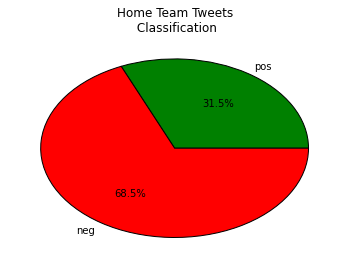

In [71]:
slices = [home_sent['pos'], home_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Home Team Tweets \n Classification')

print "Positive Tweets: ", home_sent['pos']
print "Negative Tweets: ", home_sent['neg']

plt.show()

Positive Tweets:  265
Negative Tweets:  1276


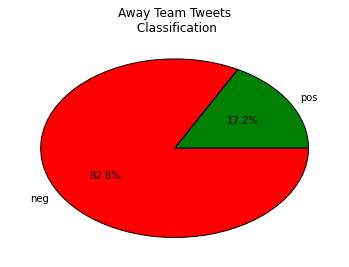

In [72]:
slices = [away_sent['pos'], away_sent['neg']]
activities = ['pos', 'neg']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        autopct='%1.1f%%')

plt.title('Away Team Tweets \n Classification')

print "Positive Tweets: ", away_sent['pos']
print "Negative Tweets: ", away_sent['neg']

plt.show()

In [74]:
import sentiment_aware
tok = sentiment_aware.Tokenizer(preserve_case=False)

In [79]:
print "\n".join(tok.tokenize("""
@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks! 
YAAAAAAY!!! >:-D http://sentimentsymposium.com/.
"""))

@sentimentsymp
:
can't
wait
for
the
nov
9
#sentiment
talks
!
yaaaaaay
!
!
!
>:-D
http
:/
/
sentimentsymposium
.
com
/
.


In [78]:
print home_tweets['text'][0]
tokenized = tok.tokenize(home_tweets['text'][0])
print "\n".join(tokenized)

RT @SkyFootball: Wanyama is not included in #SaintsFC's squad as speculation continues to mount over his future http://t.co/gLeppjHr96 http…
rt
@skyfootball
:
wanyama
is
not
included
in
#saintsfc's
squad
as
speculation
continues
to
mount
over
his
future
http
:/
/
t
.
co
/
gleppjhr
96
http
…
